# 1.0 Project Introduction

## Background
Air pollution is a pressing global issue that significantly impacts both human health and the environment. Air pollution refers to the presence of harmful substances in the atmosphere such as gases, particulate matter (PM) and biological molecules, which can pose risks to human health, wildlife and the environment. Nowdays, these pollutants often originate from human activities including industrial emissions, vehicular exhaust and energy production. The consequences of air pollution extend beyond immediate health risks which contributing to long-term issues like respiratory diseases, cardiovascular conditions and even premature mortality.

This relationship underscores the critical importance of monitoring air quality indices like the Air Pollution Index (API) to safeguard public health. By tracking and analyzing air quality data, governments and organizations can implement effective policies and strategies to mitigate pollution and promote a healthier environment for all.

## Acknowledge
We acknowledge that this dataset is obtained from the Department of Environment Malaysia. The data are collected from four Air Quality Monitoring Stations located in Pulau Pinang, specifically at Seberang Jaya, Seberang Perai, Minden, and Balik Pulau. This dataset encompasses various air quality parameters, including pollutant sizes, particle concentration levels, and meteorological factors. We extend our gratitude to the Department of Environment Malaysia for providing this valuable dataset which contributes significantly to the analysis and understanding of air quality trends in Pulau Pinang.

## Objective
The primary goal of this project is to evaluate and identify the most effective machine learning models for predicting API levels specifically in the Pulau Pinang area. By focusing on certain locations within Pulau Pinang, this study aims to enhance environmental monitoring efforts and raise public awareness regarding air quality issues.

# 2.0 Data Understanding
The dataset consists differenet location of Air Quality Monitoring Stations in the North area of Malaysia. In this project, we mainly focus on Pulau Pinang to identify the air pollution trends. The table below shows the data description of the datasets.

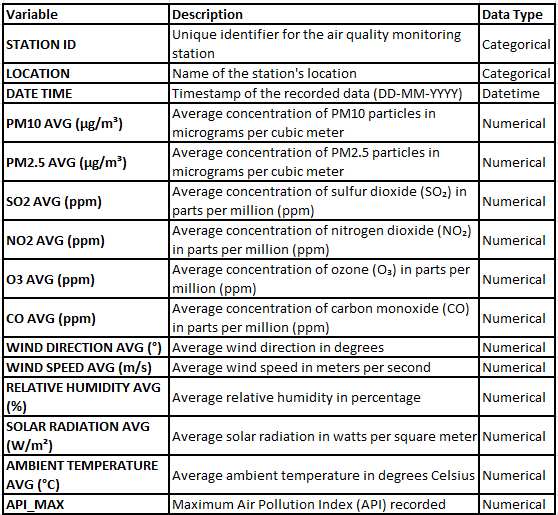

## Data Loading

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import df from drive
df = pd.read_excel('/content/drive/MyDrive/environment_data.xlsx')

In [ ]:
df.head()

,STATION ID,LOCATION,DATE TIME,PM10 AVG (µg/m3),PM2.5 AVG (µg/m3),SO2 AVG (ppm),NO2 AVG (ppm),O3 AVG (ppm),CO AVG (ppm),WIND DIRECTION AVG(°),WIND SPEED AVG(m/s),RELATIVE HUMIDITY AVG(%),SOLAR RADIATION AVG(W/m2),Ambient Temperature AVG(°c),API_MAX
0,CA01R,"Kangar, PERLIS",2019-01-01,27.727,19.386,0.0008,0.0034,0.0341,0.515,22.4009,2.1506,82.4786,170.9983,26.7793,57.0
1,CA01R,"Kangar, PERLIS",2019-01-02,37.214,26.810,0.0008,0.0038,0.0418,0.665,38.1231,1.9143,80.3679,204.2326,27.0488,63.0
2,CA01R,"Kangar, PERLIS",2019-01-03,22.057,15.681,0.0007,0.0053,0.0275,0.606,91.4141,0.9748,90.3586,42.3808,24.8631,61.0
3,CA01R,"Kangar, PERLIS",2019-01-04,11.143,7.482,0.0009,0.0021,0.0292,0.388,226.4752,2.1355,84.9641,81.7216,24.9287,54.0
4,CA01R,"Kangar, PERLIS",2019-01-05,16.805,9.850,0.0010,0.0036,0.0267,0.484,121.2816,1.2078,83.1348,198.7434,26.9366,42.0


In [ ]:
df.shape

(25564, 15)

## Data Summary


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25564 entries, 0 to 25563
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   STATION ID                   25564 non-null  object        
 1   LOCATION                     25564 non-null  object        
 2   DATE TIME                    25564 non-null  datetime64[ns]
 3   PM10 AVG (µg/m3)             25563 non-null  float64       
 4   PM2.5 AVG (µg/m3)            25563 non-null  float64       
 5   SO2 AVG (ppm)                23728 non-null  float64       
 6   NO2 AVG (ppm)                23733 non-null  float64       
 7   O3 AVG (ppm)                 21911 non-null  float64       
 8   CO AVG (ppm)                 21908 non-null  float64       
 9   WIND DIRECTION AVG(°)        25558 non-null  float64       
 10  WIND SPEED AVG(m/s)          25556 non-null  float64       
 11  RELATIVE HUMIDITY AVG(%)     25508 non-nu

In [ ]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
DATE TIME,25564,2021-07-01 12:00:00.000000256,2019-01-01 00:00:00,2020-04-01 00:00:00,2021-07-01 12:00:00,2022-10-01 00:00:00,2023-12-31 00:00:00,NaN
PM10 AVG (µg/m3),25563.0,22.259973,4.372,15.43,20.333,26.703,210.837,10.476805
PM2.5 AVG (µg/m3),25563.0,14.735787,1.862,9.298,12.914,17.937,190.561,8.767126
SO2 AVG (ppm),23728.0,0.000999,0.0001,0.0008,0.001,0.0012,0.0122,0.000369
NO2 AVG (ppm),23733.0,0.006591,0.0006,0.004,0.0061,0.0084,0.0285,0.003352
O3 AVG (ppm),21911.0,0.018347,0.0007,0.0128,0.0174,0.0229,0.0588,0.007831
CO AVG (ppm),21908.0,0.527422,0.063,0.41,0.51,0.627,2.187,0.17991
WIND DIRECTION AVG(°),25558.0,146.908539,7.4775,116.131275,147.23485,178.60105,352.7129,49.265758
WIND SPEED AVG(m/s),25556.0,1.102357,0.2253,0.789875,1.02885,1.316725,4.3348,0.470541
RELATIVE HUMIDITY AVG(%),25508.0,79.93677,49.7294,76.061875,80.534,84.4209,98.9331,6.693818


# 3.0 Data preprocessing

In [ ]:
# Replace the space with underscore
df.columns = df.columns.str.replace(' ', '_')

# Lowercase the column texts
df.columns = df.columns.str.lower()

In [ ]:
df.columns

Index(['station_id', 'location', 'date_time', 'pm10_avg_(µg/m3)',
       'pm2.5_avg_(µg/m3)', 'so2_avg_(ppm)', 'no2_avg_(ppm)', 'o3_avg_(ppm)',
       'co_avg_(ppm)', 'wind_direction_avg(°)', 'wind_speed_avg(m/s)',
       'relative_humidity_avg(%)', 'solar_radiation_avg(w/m2)',
       'ambient_temperature_avg(°c)', 'api_max'],
      dtype='object')

In [ ]:
# Filter out Pulau Pinang Station
dfpp=df[df['station_id'].isin(['CA06P','CA07P','CA08P','CA09P'])]

In [ ]:
# Drop ID
dfpp= dfpp.drop(columns=['station_id'],axis=1)

In [ ]:
# Rename the location
dfpp['location'].unique()

array(['Seberang Jaya, PULAU PINANG', 'Seberang Perai, PULAU PINANG',
       'Minden, PULAU PINANG', 'Balik Pulau, PULAU PINANG'], dtype=object)

In [ ]:
dfpp['location']=dfpp['location'].str.split(',').str[0]

In [ ]:
# Set day, month, year columns
dfpp['date_time']=pd.to_datetime(dfpp['date_time'])
dfpp['day'] = dfpp['date_time'].dt.day
dfpp['day_of_week'] = dfpp['date_time'].dt.dayofweek
dfpp['month'] = dfpp['date_time'].dt.month
dfpp['year'] = dfpp['date_time'].dt.year

The features consist of missing values are: so2_avg_(ppm), no2_avg_(ppm), relative_humidity_avg(%), solar_radiation_avg(w/m2), ambient_temperature_avg(°c) and api_max

In [ ]:
# Check missing values
dfpp.isnull().sum()

,0
location,0
date_time,0
pm10_avg_(µg/m3),0
pm2.5_avg_(µg/m3),0
so2_avg_(ppm),2
no2_avg_(ppm),3
o3_avg_(ppm),0
co_avg_(ppm),0
wind_direction_avg(°),0
wind_speed_avg(m/s),0


The data trend indicates consistent values over several days, suggesting a relationship with previous days. Therefore, the rolling method is applied.


In [ ]:
# Due to seasonal trend data, we use last 10 days mean to fill in NaN values.
dfpp['so2_avg_(ppm)'].fillna(dfpp['so2_avg_(ppm)'].rolling(10,min_periods=1).mean(),inplace=True)
dfpp['no2_avg_(ppm)'].fillna(dfpp['no2_avg_(ppm)'].rolling(10,min_periods=1).mean(),inplace=True)

<ipython-input-15-8616d991f2f6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfpp['so2_avg_(ppm)'].fillna(dfpp['so2_avg_(ppm)'].rolling(10,min_periods=1).mean(),inplace=True)
<ipython-input-15-8616d991f2f6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

Since the features are independent on a daily basis, imputing missing values with the mean is a suitable approach.


In [ ]:
# Fill with mean
dfpp['api_max'].fillna(dfpp['api_max'].mean(), inplace=True)
dfpp['relative_humidity_avg(%)'].fillna(dfpp['relative_humidity_avg(%)'].mean(), inplace=True)
dfpp['solar_radiation_avg(w/m2)'].fillna(dfpp['solar_radiation_avg(w/m2)'].mean(),inplace=True)

<ipython-input-16-199eaa56fd6d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfpp['api_max'].fillna(dfpp['api_max'].mean(), inplace=True)
<ipython-input-16-199eaa56fd6d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
# Create pm_ratio feature
dfpp['pm_ratio'] = dfpp['pm2.5_avg_(µg/m3)'] / dfpp['pm10_avg_(µg/m3)']

In [ ]:
# Create category function
def api_cat(value):
  if value <= 50:
    return 'Good'
  elif 50 < value <= 100:
    return 'Moderate'
  elif 100 < value <= 200:
    return 'Unhealthy'
  elif 200 < value <= 300:
    return 'Very Unhealthy'
  else:
    return 'Hazardous'

In [ ]:
# Apply category function
dfpp['api_cat'] = dfpp['api_max'].apply(api_cat)

In [ ]:
# Check the missing value and cleaned features are confirmed
dfpp.isnull().sum()

,0
location,0
date_time,0
pm10_avg_(µg/m3),0
pm2.5_avg_(µg/m3),0
so2_avg_(ppm),0
no2_avg_(ppm),0
o3_avg_(ppm),0
co_avg_(ppm),0
wind_direction_avg(°),0
wind_speed_avg(m/s),0


In [ ]:
# Create next day API
dfpp['next_api']=dfpp['api_max'].shift(-1)

# 4.0 EDA

In [ ]:
dfpp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7304 entries, 1825 to 23738
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   location                     7304 non-null   object        
 1   date_time                    7304 non-null   datetime64[ns]
 2   pm10_avg_(µg/m3)             7304 non-null   float64       
 3   pm2.5_avg_(µg/m3)            7304 non-null   float64       
 4   so2_avg_(ppm)                7304 non-null   float64       
 5   no2_avg_(ppm)                7304 non-null   float64       
 6   o3_avg_(ppm)                 7304 non-null   float64       
 7   co_avg_(ppm)                 7304 non-null   float64       
 8   wind_direction_avg(°)        7304 non-null   float64       
 9   wind_speed_avg(m/s)          7304 non-null   float64       
 10  relative_humidity_avg(%)     7304 non-null   float64       
 11  solar_radiation_avg(w/m2)    7304 non-null  

## Univariate analysis
* Positive Skew:
The histograms reveal that most variables are positively skewed, with the exception of relative humidity.
The skewness values of PM10, PM2.5, api_max, NO2 and SO₂ are extremely high. This indicates that the dataset contains significant outliers or rare high-concentration events, as shown in the boxplots.

* Symmetry:
Variables such as Relative Humidity, Wind Direction, Wind Speed, Solar Radiation and Ambient Temperature are nearly symmetric reflecting expected meteorological patterns.
Outlier analysis revealed that nearly 10% of the data would be excluded if rows with extreme API values were removed, as highlighted in the boxplot. However, since this study aims to capture the full variability of API, including rare but significant events like haze, outliers have been retained.

This approach ensures the dataset accurately reflects real-world conditions in Malaysia, where such extreme events play a critical role in air quality monitoring and prediction. However, the inclusion of these outliers introduces challenges for certain machine learning algorithms due to the skewed data distribution.



### Histogram

In [ ]:
# Select the numerical value features for histogram analysis
num_feature = dfpp.select_dtypes(include=['float64','int64']).columns

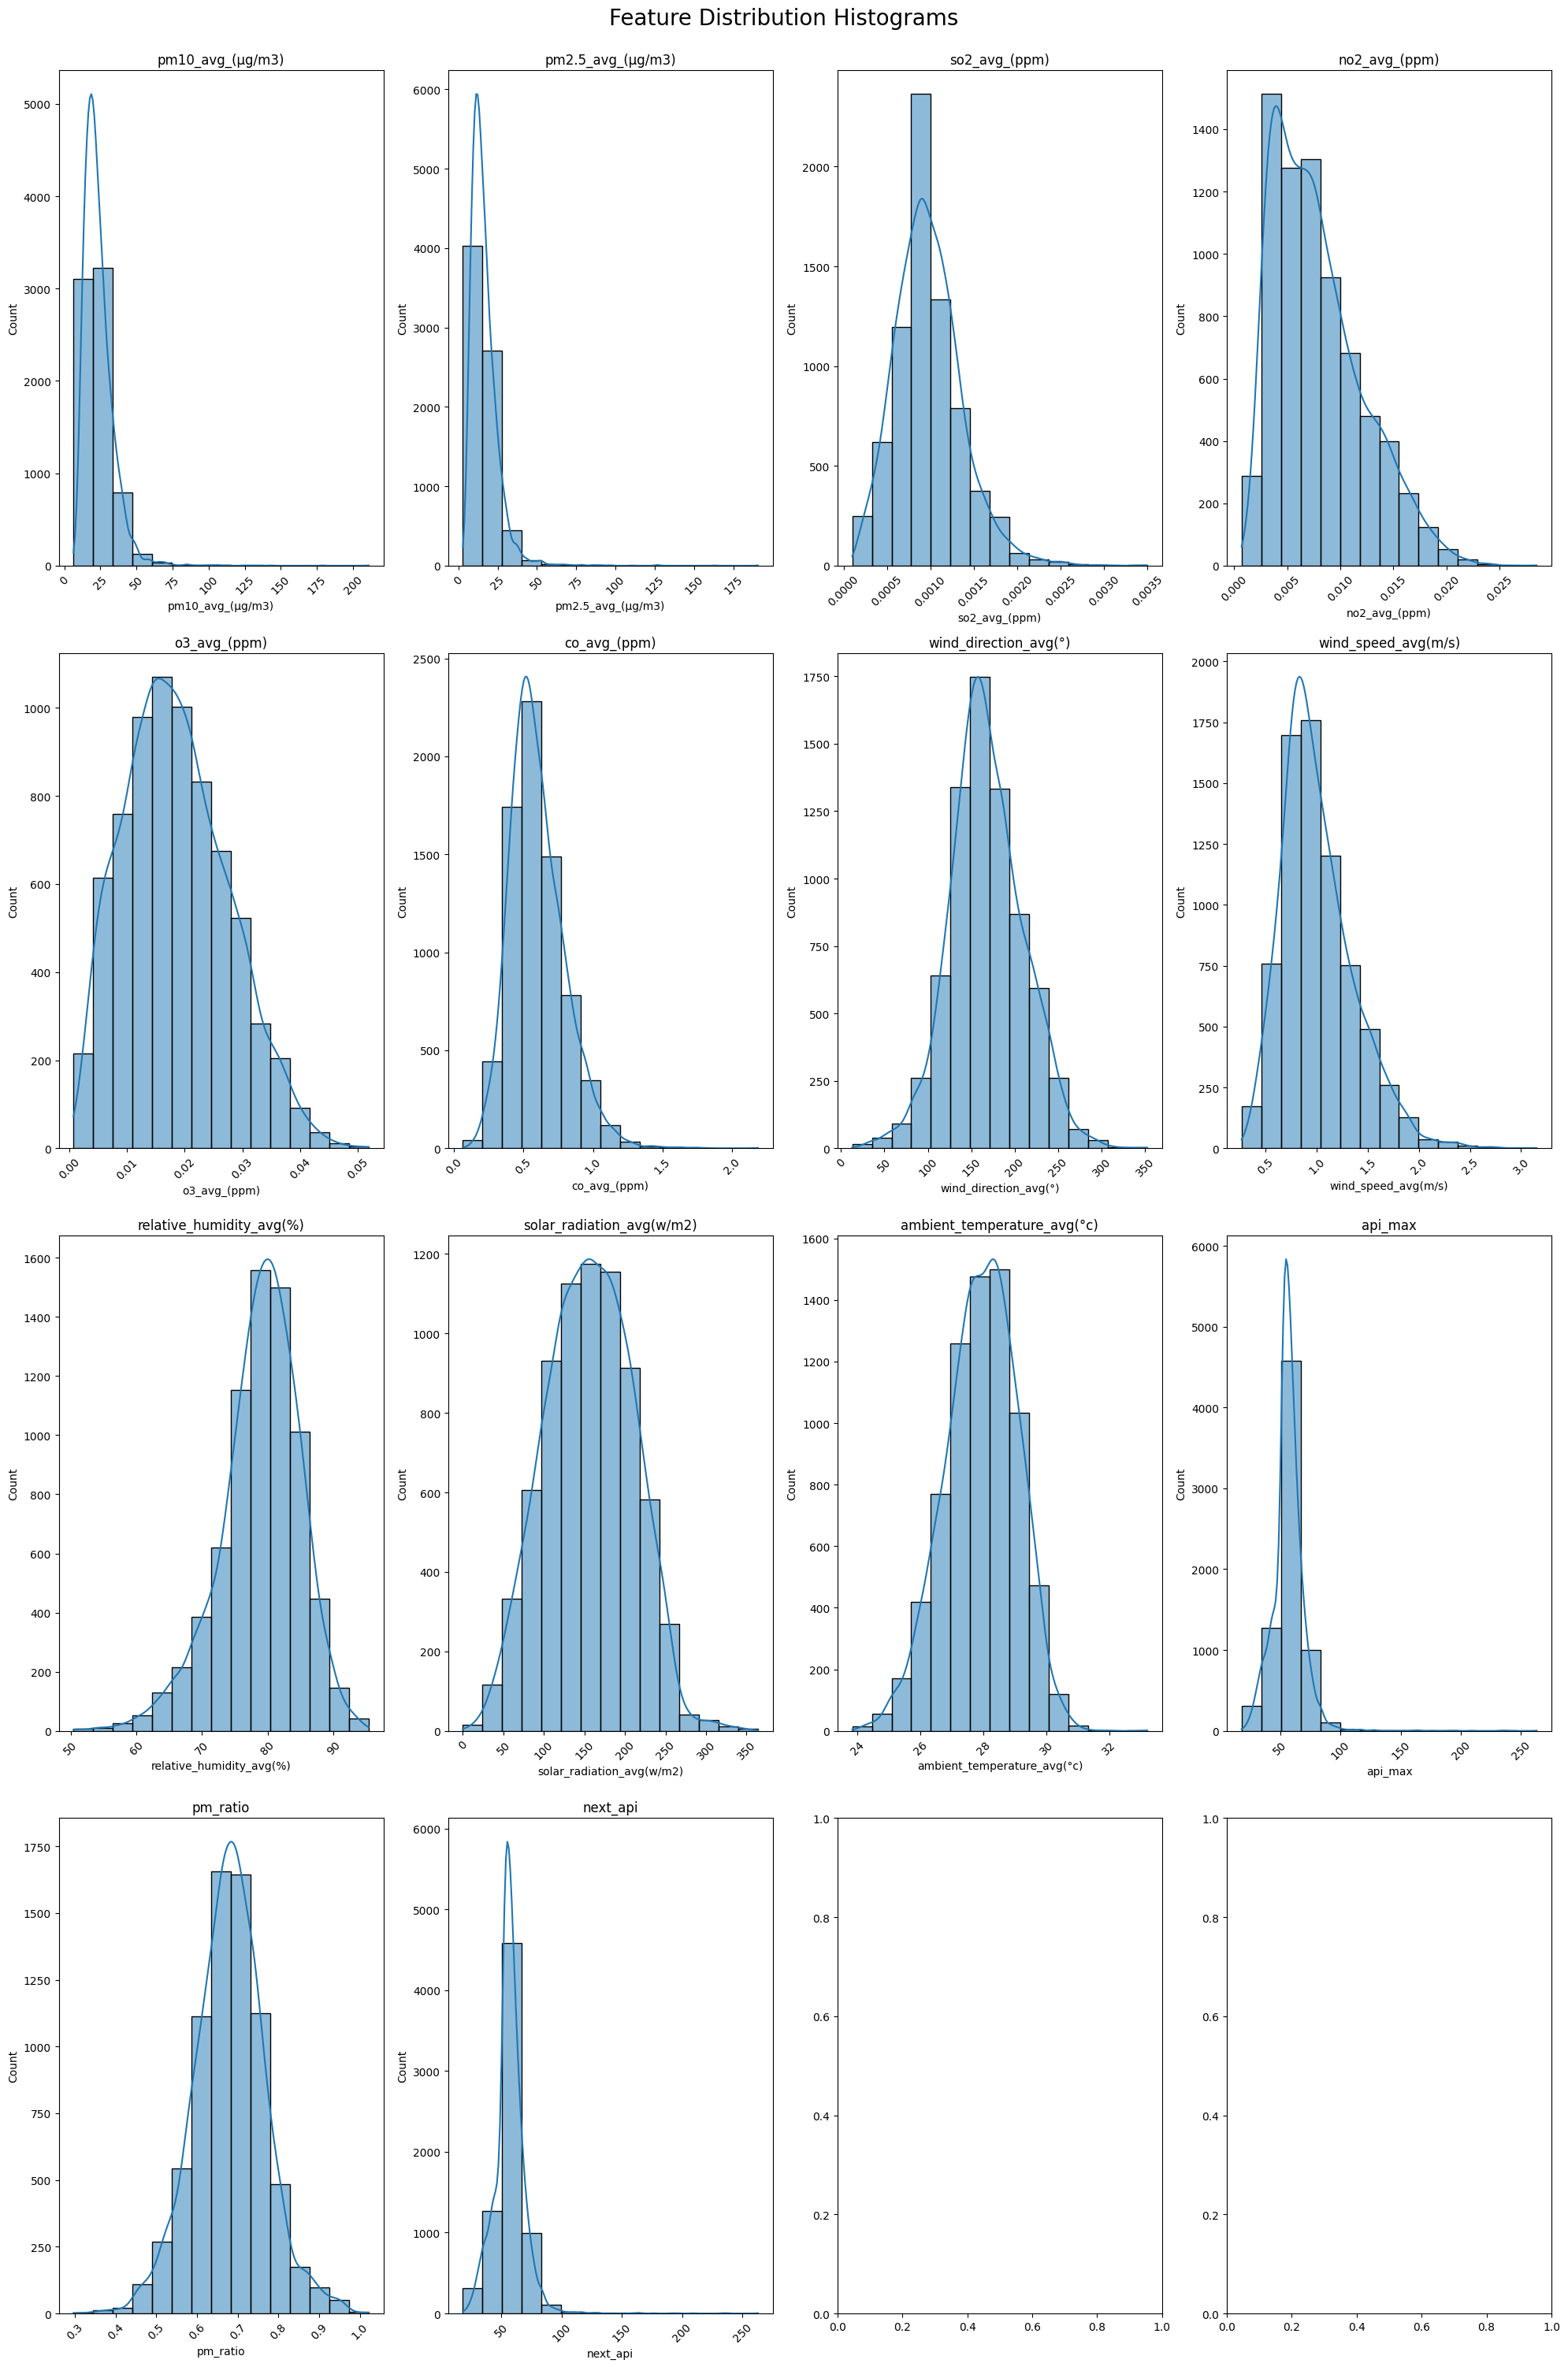

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 30))
fig.tight_layout(pad=2.0)
fig.suptitle('Feature Distribution Histograms', fontsize=20, y=1)

for col in num_feature:
    row, col_idx = divmod(num_feature.get_loc(col), 4)
    ax = axes[row, col_idx]

    sns.histplot(data=dfpp, x=col, ax=ax, bins=15, kde=True)
    ax.set_title(col, fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Boxplots

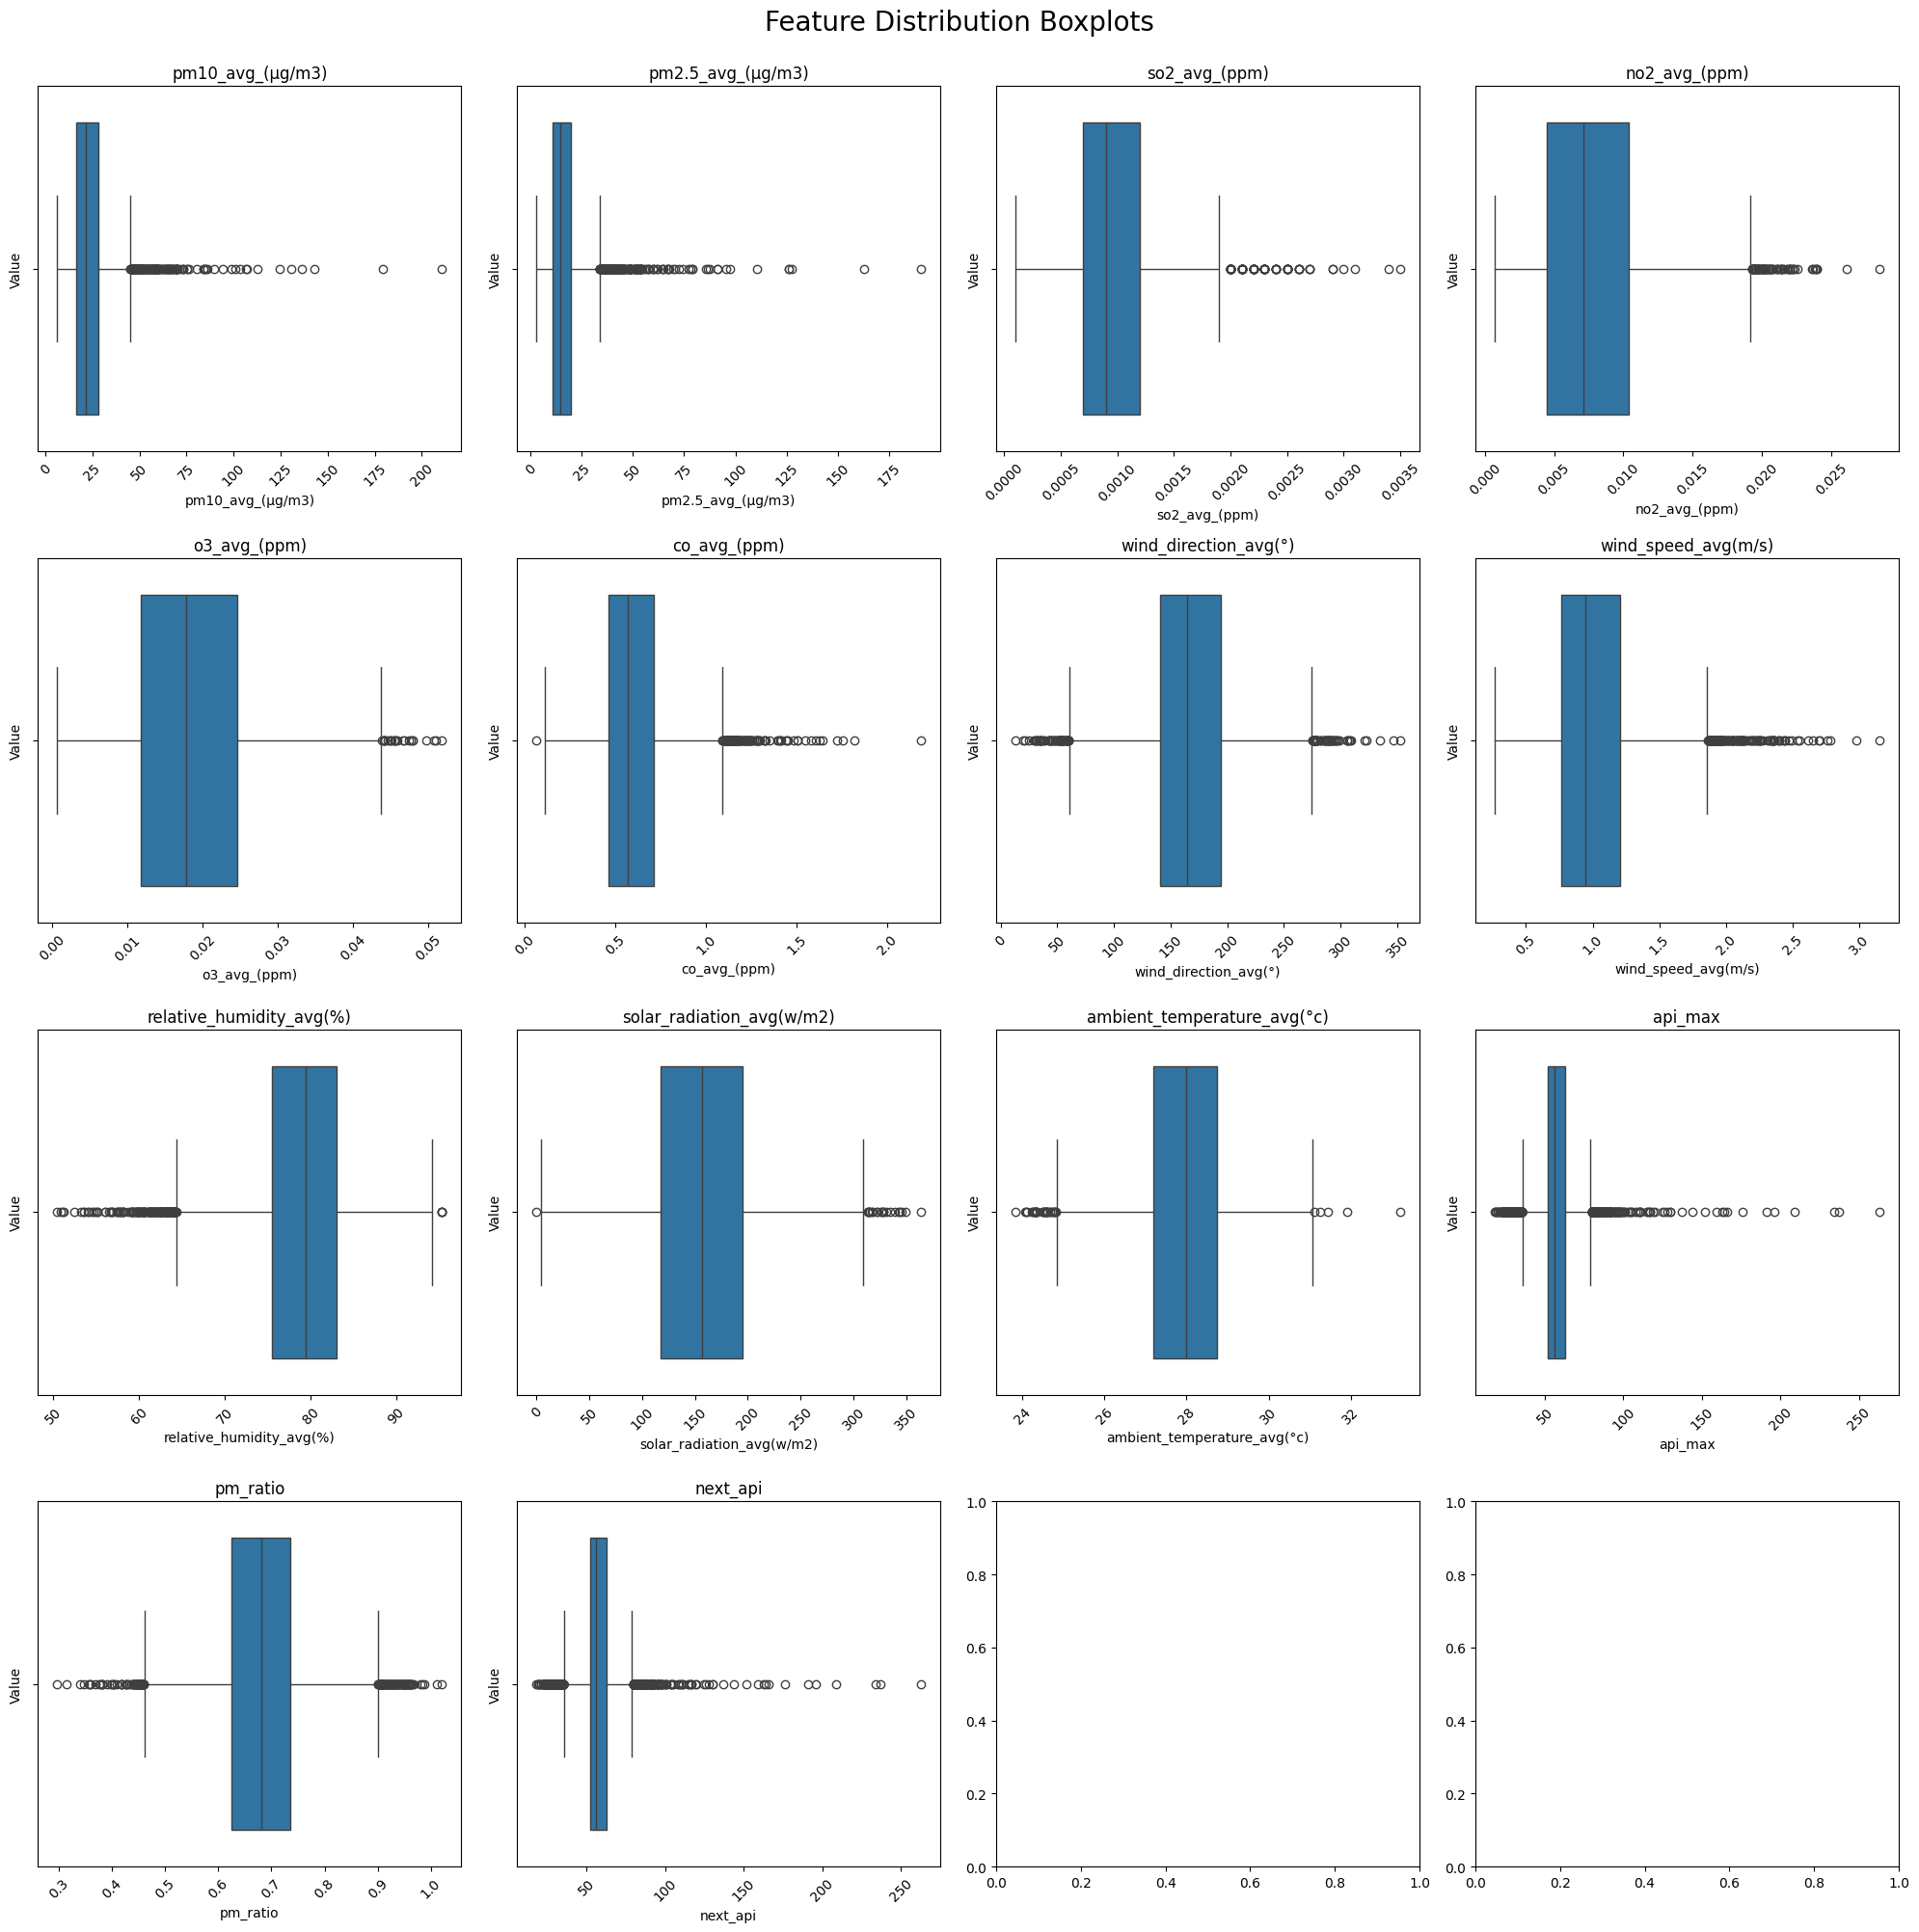

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.tight_layout(pad=2.0)
fig.suptitle('Feature Distribution Boxplots', fontsize=20, y=1)

for col in num_feature:
    row, col_idx = divmod(num_feature.get_loc(col), 4)
    ax = axes[row, col_idx]

    sns.boxplot(data=dfpp, x=col, ax=ax)

    ax.set_title(col, fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Value", fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Correlation analysis





the strength of the correlation is classified according to the following ranges (Ajayi, 2024):
- Weak: |r|<0.3
- Moderate: 0.3<=|r|<0.7
- Strong: |r|>=0.7


1.  **PM10 and PM2.5 Redundancy**


* A strong positive correlation (0.98) was observed between PM10 and PM2.5, indicating significant redundancy between these two variables. Despite this, both were retained in the analysis due to their substantial contributions to the Air Pollution Index (API). PM2.5 poses a greater health risk due to its smaller size and ability to penetrate deep into the lungs, while PM10, although larger, still impacts respiratory health, particularly in urban environments. Including both variables ensures a comprehensive representation of air quality, especially during haze events, when both particulate sizes tend to peak simultaneously.

2. **O3 Correlations**

* Ozone (O3) concentration showed a moderate to strong positive correlation with ambient temperature (0.48) and location (0.41), suggesting that higher temperatures contribute to increased O3 formation. Conversely, O3 exhibited a moderate negative correlation with relative humidity (-0.52), implying that higher humidity levels, often associated with rainy periods, tend to reduce O3 concentrations. This relationship suggests that rainfall plays a role in mitigating O3 levels by removing pollutants from the atmosphere.

* Additionally, O3 displayed a positive correlation with solar radiation (0.37), reinforcing the well-documented photochemical formation of O3, where sunlight drives reactions involving nitrogen oxides (NOx) and volatile organic compounds (VOCs).

3. Pollutant Sources
Moderately strong positive correlations were observed among several key pollutants, indicating potential common sources:

* NO2 with PM10 and PM2.5 (0.28)
* CO with PM10 (0.41) and PM2.5 (0.43)
* O3 with PM10 (0.39) and PM2.5 (0.40)
* CO and NO2 (0.63)

In [ ]:
# Select object type features
obj = [col for col in dfpp.columns if dfpp[col].dtype =='object']

In [ ]:
# Object type mapping
location_mapping = {
    'Seberang Jaya': 1,
    'Seberang Perai': 2,
    'Minden': 3,
    'Balik Pulau': 4
}

air_quality_mapping = {
    'Good': 1,
    'Moderate': 2,
    'Unhealthy': 3,
    'Very Unhealthy': 4
}

dfpp['location'] = dfpp['location'].map(location_mapping)
dfpp['api_cat'] = dfpp['api_cat'].map(air_quality_mapping)

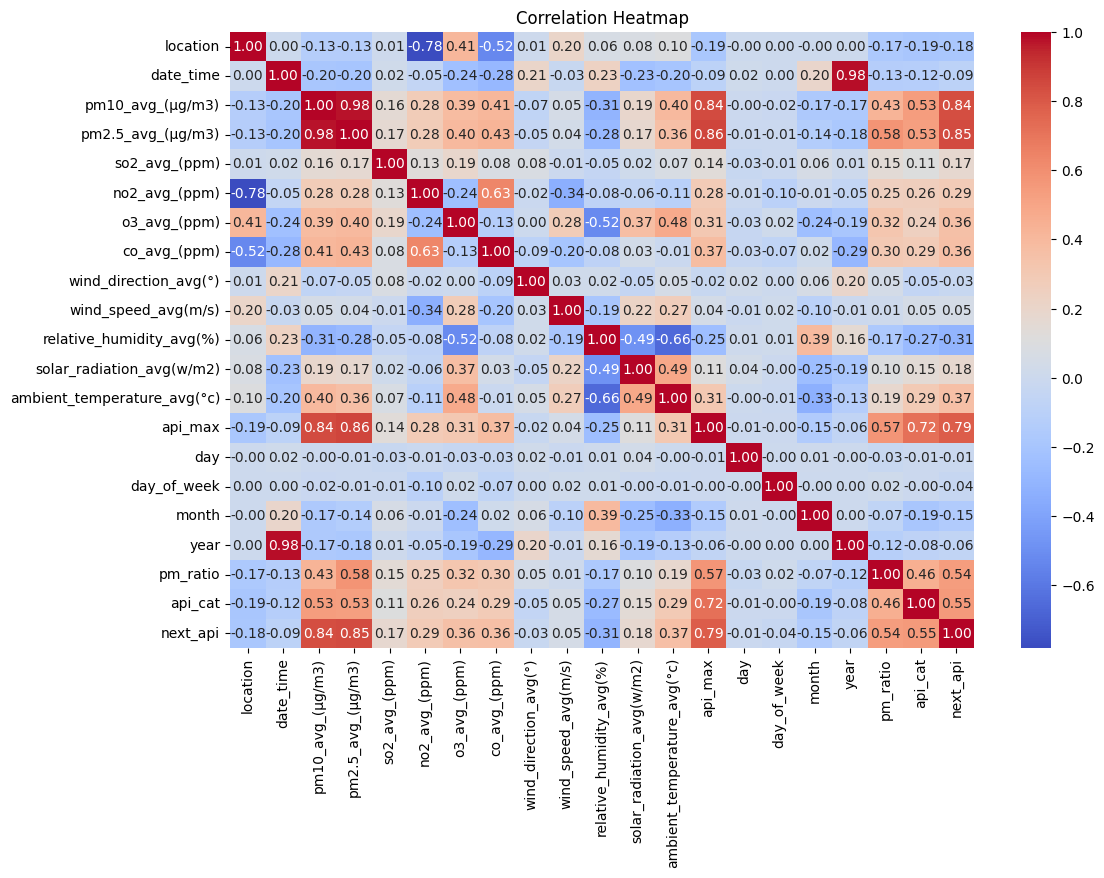

In [ ]:
# Heatmap to study correlation of the features.
plt.figure(figsize=(12,8))

sns.heatmap(dfpp.corr(),annot=True,cmap='coolwarm', fmt='0.2f')
plt.title('Correlation Heatmap')
plt.show()

## Time series analysis

Under the time-series analysis section, three main analysis were done:

* Rolling Average Time Series Plot (7-days and 30-days)
* API Max based on locations
* Subplots for API Max based on months
* Subplots for each features
* Heatmap for API Max by Day

In [ ]:
dfpp['date_time']=pd.to_datetime(dfpp['date_time'])

In [ ]:
df_ts = dfpp.set_index(dfpp['date_time'])

In [ ]:
# Set mean of rolling 7 days
df_ts = df_ts.groupby(df_ts.index).agg({'api_max': 'mean'})

rolling_7days = df_ts['api_max'].rolling(window=7).mean()
rolling_30days = df_ts['api_max'].rolling(window=14).mean()

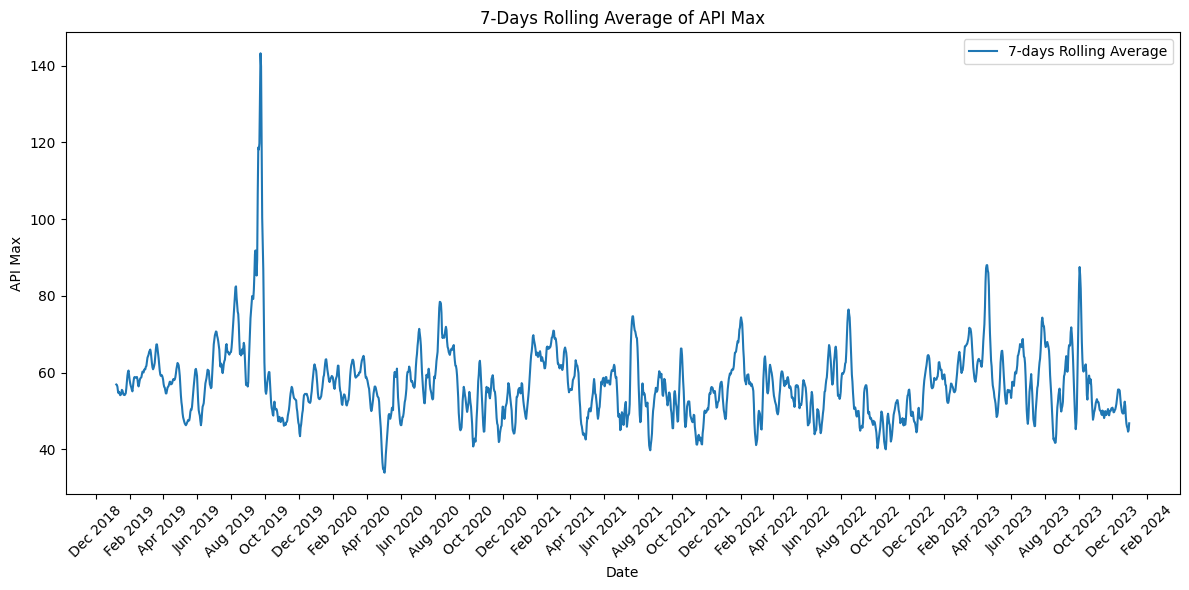

In [ ]:
import matplotlib.dates as mdates

# Plotting the graph
plt.figure(figsize=(12,6))

plt.plot(rolling_7days.index,rolling_7days.values,label='7-days Rolling Average')

# Label and title
plt.title('7-Days Rolling Average of API Max')
plt.xlabel('Date')
plt.ylabel('API Max')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set date format and interval for x-axis
loc = mdates.MonthLocator(interval=2)
plt.gca().xaxis.set_major_locator(loc)
fmt = mdates.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(fmt)

plt.tight_layout()
plt.show()

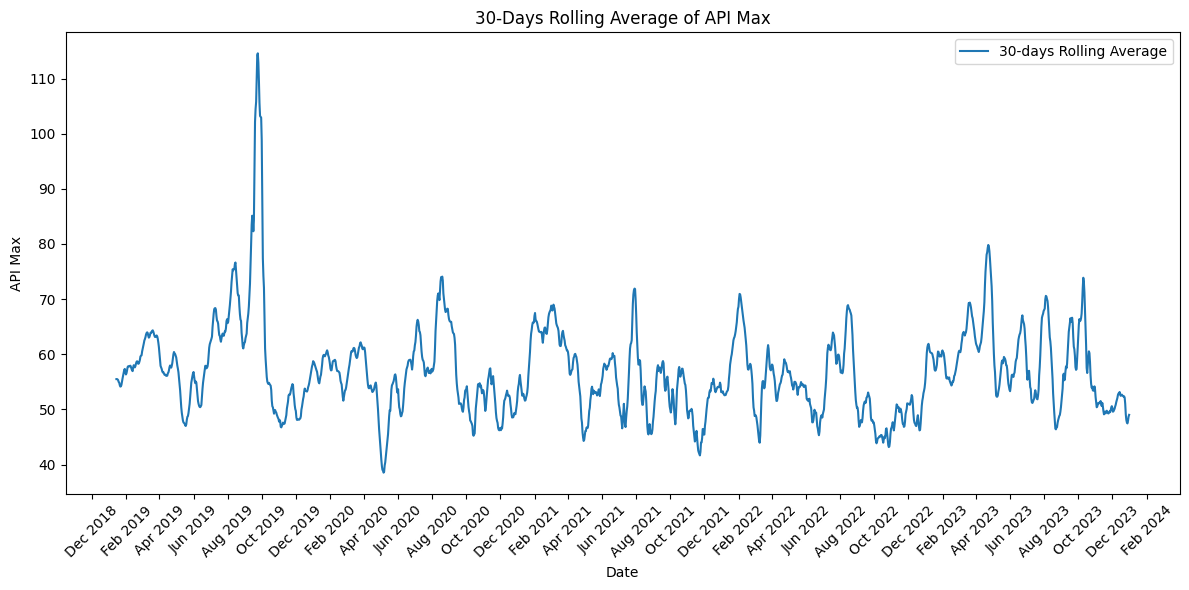

In [ ]:
# Plotting the graph
plt.figure(figsize=(12,6))

plt.plot(rolling_30days.index,rolling_30days.values,label='30-days Rolling Average')

# Label and title
plt.title('30-Days Rolling Average of API Max')
plt.xlabel('Date')
plt.ylabel('API Max')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set date format and interval for x-axis
loc = mdates.MonthLocator(interval=2)
plt.gca().xaxis.set_major_locator(loc)
fmt = mdates.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(fmt)

plt.tight_layout()
plt.show()

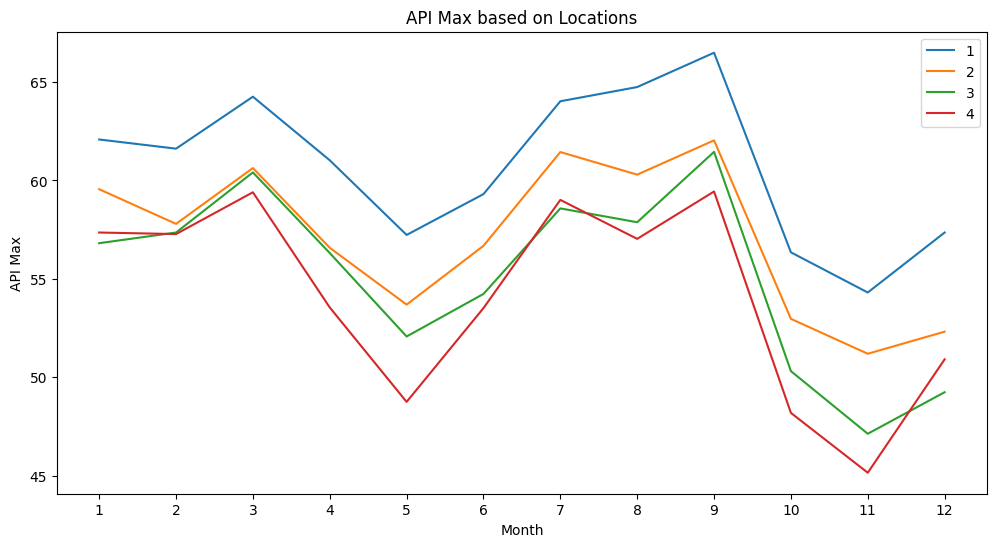

In [ ]:
# Select the important information for the time series graph
dfpp[['month','year','api_max']]

# List out unique locations
locs = dfpp['location'].unique()

plt.figure(figsize=(12,6))

for loc in locs:
  monthly_avg = dfpp[dfpp['location'] == loc].groupby('month')['api_max'].mean()
  X = monthly_avg.index
  Y = monthly_avg.values

  plt.plot(X,Y,label=loc)

# Label and title
plt.title('API Max based on Locations')
plt.xlabel('Month')
plt.ylabel('API Max')
plt.xticks(range(1,13))
plt.legend()
plt.show()

### Subplots of API MAX based on months

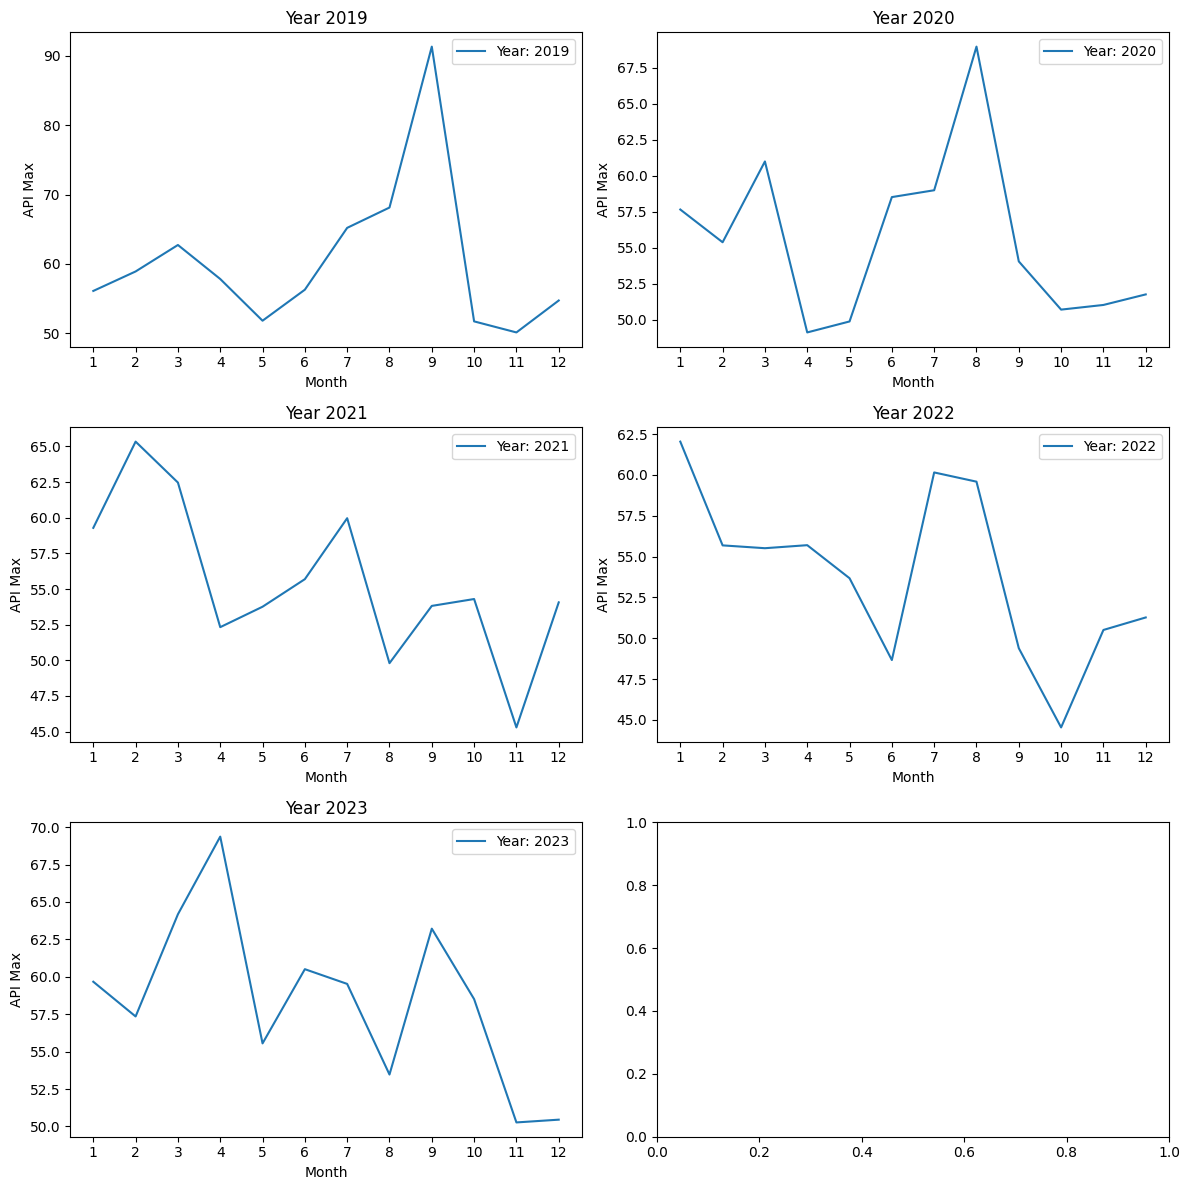

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Unique years
unique_years = dfpp['year'].unique()

for i, year in enumerate(unique_years):
    monthly_avg = dfpp[dfpp['year'] == year].groupby('month')['api_max'].mean()
    X = monthly_avg.index
    Y = monthly_avg.values

    ax = axes[i]
    ax.plot(X, Y, label=f'Year: {year}')

    ax.set_title(f'Year {year}', fontsize=12)
    ax.set_xlabel('Month')
    ax.set_ylabel('API Max')
    ax.set_xticks(range(1, 13))
    ax.legend()

plt.tight_layout()
plt.show()

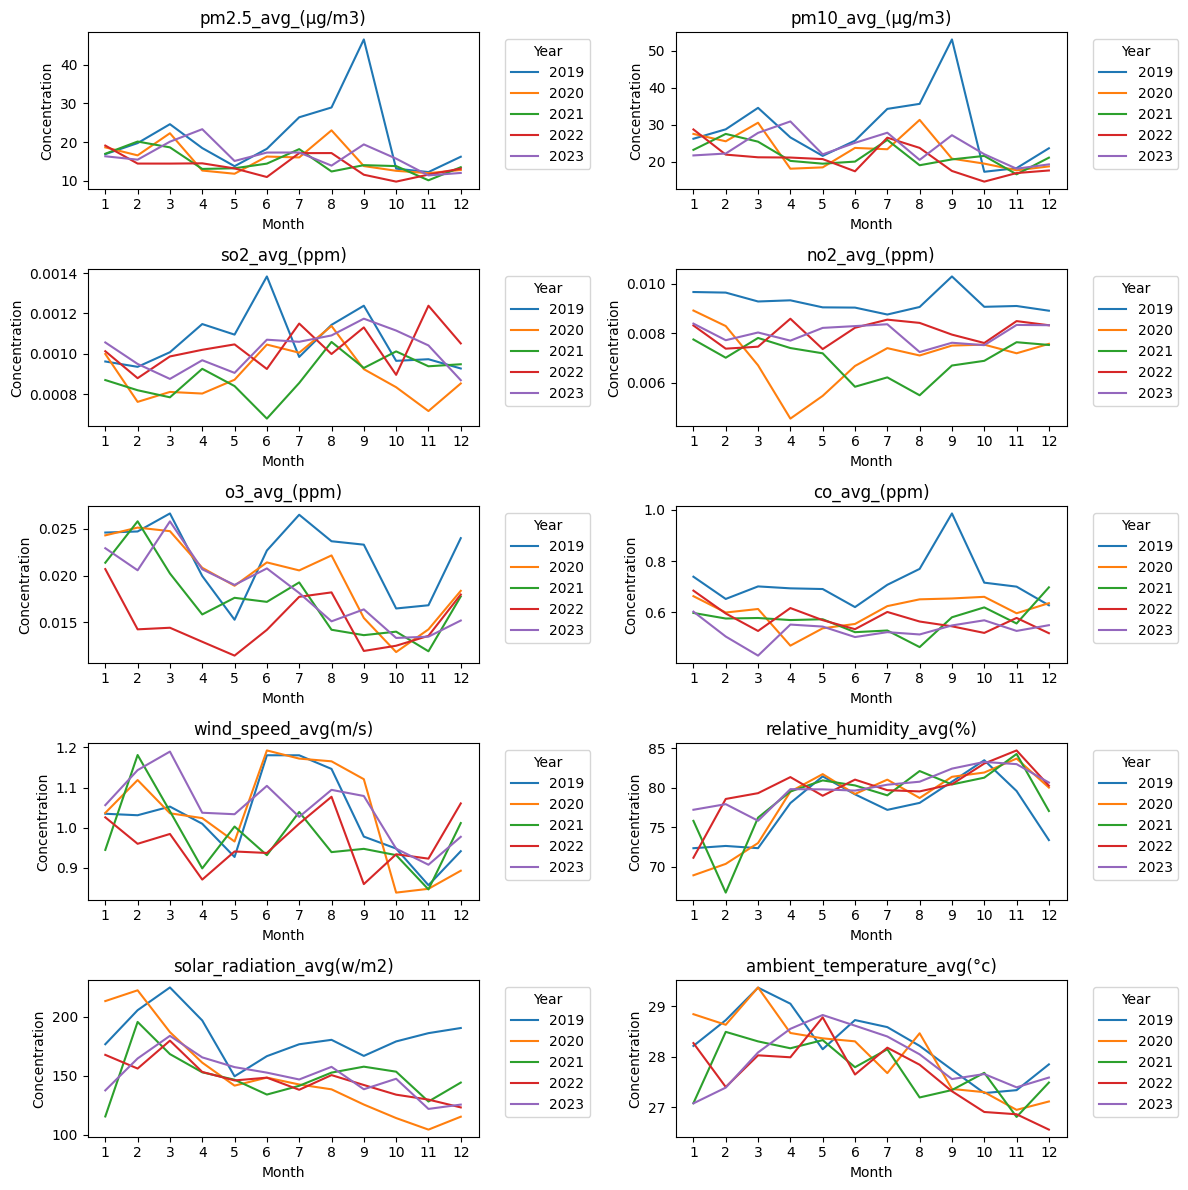

In [ ]:
# Select pollutants and meteorological variables
variables_to_plot = ['pm2.5_avg_(µg/m3)', 'pm10_avg_(µg/m3)',
                      'so2_avg_(ppm)', 'no2_avg_(ppm)', 'o3_avg_(ppm)', 'co_avg_(ppm)',
                      'wind_speed_avg(m/s)', 'relative_humidity_avg(%)',
                      'solar_radiation_avg(w/m2)', 'ambient_temperature_avg(°c)']

fig, axes = plt.subplots(5, 2, figsize=(12, 12))

axes = axes.flatten()


for i, var in enumerate(variables_to_plot):
    ax = axes[i]

    # Group data by Month & Year and calculate mean for each variable
    monthly_avg = dfpp.groupby(['year', 'month'])[var].mean().reset_index()

    # Create a pivot table to reshape the data for visualization
    pivot_table = monthly_avg.pivot(index='month', columns='year', values=var)

    pivot_table.plot(ax=ax)

    ax.set_title(var, fontsize=12)
    ax.set_xlabel('Month')
    ax.set_ylabel('Concentration')
    ax.set_xticks(range(1, 13))
    ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

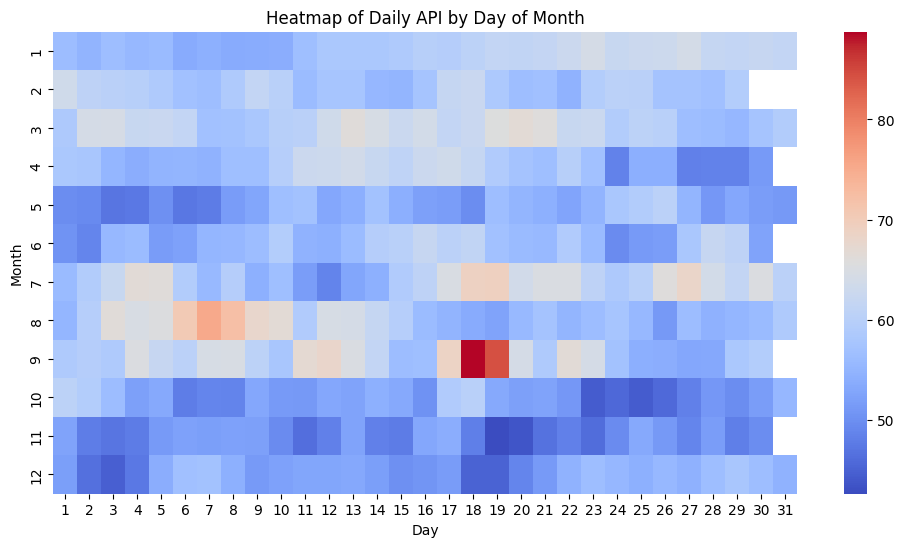

In [ ]:
api_heatmap = dfpp.pivot_table(values='api_max', index='month', columns='day', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(api_heatmap, cmap='coolwarm', annot=False)
plt.title('Heatmap of Daily API by Day of Month')
plt.xlabel('Day')
plt.ylabel('Month')
plt.show()

# 5.0 Regression Modeling

To predict API levels in this project, we used regression models for training as listed below:

Regression
* Linear regression
* Lasso regression
* Decision Tree
* Random Forest

Goal to evaluate and identify the most effective machine learning models for predicting API value.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [ ]:
# To fix the NaN on last row
api_mean = dfpp['next_api'].mean()

dfpp['next_api'].fillna(api_mean, inplace=True)

<ipython-input-39-20330422c3ec>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfpp['next_api'].fillna(api_mean, inplace=True)


In [ ]:
# Drop the target variable
dfpp.set_index('date_time', inplace=True)
df1 = dfpp.drop(columns=['api_max'],axis=1)

# Define X and y variables
X = df1
y = dfpp['api_max']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shape of the datasets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (5112, 19) (5112,)
Validation set: (1096, 19) (1096,)
Test set: (1096, 19) (1096,)


In [ ]:
# Preprocess the data
# Select the obj and cat features
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [ ]:
# Pipeline steps
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# Combine transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

In [ ]:
# To update package of scikit-learn
!pip install --upgrade scikit-learn xgboost

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\n{name} result")

    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Fit model on training data
    pipeline.fit(X_train, y_train)

    # Predict on validation set
    y_val_pred = pipeline.predict(X_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)

    print(f"{name} - Validation RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")


Linear Regression result
Linear Regression - Validation RMSE: 5.1355, R²: 0.8128

Lasso Regression result
Lasso Regression - Validation RMSE: 5.1356, R²: 0.8128

Decision Tree result
Decision Tree - Validation RMSE: 4.9697, R²: 0.8247

XGBoost result
XGBoost - Validation RMSE: 4.6267, R²: 0.8480


Based on the model comparison, XGBoost performed the best with the lowest validation RMSE (4.6267) and the highest R² (0.8480), indicating superior predictive accuracy. The Decision Tree followed with an RMSE of 4.9697 and R² of 0.8247. Both Linear Regression and Lasso Regression yielded similar results (RMSE: ~5.1355, R²: 0.8128).

# 6.0 Hyperparameter Tuning

In [ ]:
param_grids = {

    "Lasso Regression": {
        'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
    },

    "Decision Tree": {
        'regressor__max_depth': [3, 5, 10, None],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4]
    },

    "XGBoost": {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.3],
        'regressor__max_depth': [3, 5, 7],
        'regressor__subsample': [0.7, 0.9, 1.0]
    }
}

## Lasso


In [ ]:
lasso = Lasso()

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Extract the best model
best_lasso = grid_search.best_estimator_

# Display the best alpha
print(f"Best alpha: {grid_search.best_params_['alpha']}")

Best alpha: 0.0001


In [ ]:
# Predictions on the test set
y_pred_test = best_lasso.predict(X_test)

# Predictions on the validation set
y_pred_val = best_lasso.predict(X_val)

# Calculate metrics
lasso_mae_test = mean_absolute_error(y_test, y_pred_test)
lasso_mse_test = mean_squared_error(y_test, y_pred_test)
lasso_rmse_test = np.sqrt(lasso_mse_test)
lasso_r2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics for the test set
print("\nTest Set Evaluation Metrics:")
print(f"  MAE: {lasso_mae_test:.4f}, MSE: {lasso_mse_test:.4f}, RMSE: {lasso_rmse_test:.4f}, R²: {lasso_r2_test:.4f}")

# Validation set metrics
lasso_mae_val = mean_absolute_error(y_val, y_pred_val)
lasso_mse_val = mean_squared_error(y_val, y_pred_val)
lasso_rmse_val = np.sqrt(lasso_mse_val)
lasso_r2_val = r2_score(y_val, y_pred_val)

print("\nValidation Set Evaluation Metrics:")
print(f"  MAE: {lasso_mae_val:.4f}, MSE: {lasso_mse_val:.4f}, RMSE: {lasso_rmse_val:.4f}, R²: {lasso_r2_val:.4f}")


Test Set Evaluation Metrics:
  MAE: 3.6347, MSE: 24.2996, RMSE: 4.9295, R²: 0.8534

Validation Set Evaluation Metrics:
  MAE: 3.5893, MSE: 25.6284, RMSE: 5.0625, R²: 0.8181


## Decision Tree

In [ ]:
dt_model = DecisionTreeRegressor()

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, 20, None],  # Depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5, 10]  # Minimum samples in a leaf
}

# Perform GridSearchCV to tune hyperparameters
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                              scoring='neg_mean_squared_error', cv=5, verbose=3)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-35.233 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-32.075 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-37.153 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-48.286 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-50.489 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-35.233 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-32.075 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-37.153 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-48.286 total time=   0.1s
[CV 5/5] END max_depth=3, min

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
best_dt = grid_search_dt.best_estimator_
print("Best Hyperparameters:", grid_search_dt.best_params_)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
# Predictions on the test set
y_pred_test = best_dt.predict(X_test)

# Predictions on the validation set
y_pred_val = best_dt.predict(X_val)

# Calculate metrics
dt_mae_test = mean_absolute_error(y_test, y_pred_test)
dt_mse_test = mean_squared_error(y_test, y_pred_test)
dt_rmse_test = np.sqrt(dt_mse_test)
dt_r2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics for the test set
print("\nTest Set Evaluation Metrics:")
print(f"  MAE: {dt_mae_test:.4f}, MSE: {dt_mse_test:.4f}, RMSE: {dt_rmse_test:.4f}, R²: {dt_r2_test:.4f}")

# Validation set metrics
dt_mae_val = mean_absolute_error(y_val, y_pred_val)
dt_mse_val = mean_squared_error(y_val, y_pred_val)
dt_rmse_val = np.sqrt(dt_mse_val)
dt_r2_val = r2_score(y_val, y_pred_val)

print("\nValidation Set Evaluation Metrics:")
print(f"  MAE: {dt_mae_val:.4f}, MSE: {dt_mse_val:.4f}, RMSE: {dt_rmse_val:.4f}, R²: {dt_r2_val:.4f}")


Test Set Evaluation Metrics:
  MAE: 3.4455, MSE: 23.0083, RMSE: 4.7967, R²: 0.8612

Validation Set Evaluation Metrics:
  MAE: 3.4297, MSE: 26.0198, RMSE: 5.1010, R²: 0.8153


## XGBRegression

In [ ]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [ ]:
# Define parameters range
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0]
}

In [ ]:
# Grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Minimize RMSE
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.9, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}


In [ ]:
# Predictions
y_pred_test = best_xgb.predict(X_test)
y_pred_val = best_xgb.predict(X_val)

# Test set metrics
xgb_mae_test = mean_absolute_error(y_test, y_pred_test)
xgb_mse_test = mean_squared_error(y_test, y_pred_test)
xgb_rmse_test = np.sqrt(xgb_mse_test)
xgb_r2_test = r2_score(y_test, y_pred_test)

print("\nTest Set Evaluation Metrics:")
print(f"  MAE: {xgb_mae_test:.4f}, MSE: {xgb_mse_test:.4f}, RMSE: {xgb_rmse_test:.4f}, R²: {xgb_r2_test:.4f}")

# Validation set metrics
xgb_mae_val = mean_absolute_error(y_val, y_pred_val)
xgb_mse_val = mean_squared_error(y_val, y_pred_val)
xgb_rmse_val = np.sqrt(xgb_mse_val)
xgb_r2_val = r2_score(y_val, y_pred_val)

print("\nValidation Set Evaluation Metrics:")
print(f"  MAE: {xgb_mae_val:.4f}, MSE: {xgb_mse_val:.4f}, RMSE: {xgb_rmse_val:.4f}, R²: {xgb_r2_val:.4f}")


Test Set Evaluation Metrics:
  MAE: 3.0322, MSE: 19.5684, RMSE: 4.4236, R²: 0.8820

Validation Set Evaluation Metrics:
  MAE: 2.9679, MSE: 19.6351, RMSE: 4.4311, R²: 0.8606


## Results Comparison

In [ ]:
# Before tuning (v1)
metrics_before = {
    "Linear Regression": [5.1355, 0.8128],
    "Lasso Regression": [5.1356, 0.8128],
    "Decision Tree": [4.9697, 0.8247],
    "XGBoost": [4.6267, 0.8480]
}

# After tuning (without v1)
metrics_after = {
    "Linear Regression": [5.1355, 0.812], # Constant because there is no tuning for Linear Regression
    "Lasso Regression": [lasso_rmse_val, lasso_r2_val],
    "Decision Tree": [dt_rmse_val, dt_r2_val],
    "XGBoost": [xgb_rmse_val, xgb_r2_val]
}

In [ ]:
df_results = pd.DataFrame.from_dict(metrics_before, orient='index', columns=['RMSE Before', 'R² Before'])
df_results[['RMSE After', 'R² After']] = pd.DataFrame.from_dict(metrics_after, orient='index')

# Calculate percentage improvement
df_results['RMSE Improvement (%)'] = ((df_results['RMSE Before'] - df_results['RMSE After']) / df_results['RMSE Before']) * 100
df_results['R² Improvement (%)'] = ((df_results['R² After'] - df_results['R² Before']) / df_results['R² Before']) * 100

print(df_results)


                   RMSE Before  R² Before  RMSE After  R² After  \
Linear Regression       5.1355     0.8128    5.135500  0.812000   
Lasso Regression        5.1356     0.8128    5.062451  0.818056   
Decision Tree           4.9697     0.8247    5.100956  0.815277   
XGBoost                 4.6267     0.8480    4.431148  0.860604   

                   RMSE Improvement (%)  R² Improvement (%)  
Linear Regression              0.000000           -0.098425  
Lasso Regression               1.424357            0.646623  
Decision Tree                 -2.641122           -1.142538  
XGBoost                        4.226604            1.486364  


After hyperparameter tuning, XGBoost showed the most improvement, reducing RMSE by 4.23% and increasing R² by 1.49%, further solidifying its position as the best-performing model. Lasso Regression also improved, with a 1.42% RMSE reduction and a 0.65% R² increase, suggesting that tuning helped refine its regularization strength.

However, Decision Tree performance slightly declined, with RMSE increasing by 2.64% and R² decreasing by 1.14%, possibly due to overfitting mitigation from stricter hyperparameters. Linear Regression remained unchanged because there is no hyperparameter tuning applied on it.

# 7.0 Feature Engineering

* Feature engineering is applied to increase the features for better generalization of the models. Lag feature is commonly used in the environment data analysis.

* A lag feature refers to a previous time step’s value added as a new feature in a dataset. This helps capture trends, patterns, and dependencies over time.

* PM2.5, PM10, and the concentration of pollutants were selected for lag feature engineering due to their persistent impact on air quality trends and their potential time-dependent influence on pollution levels.

In [ ]:
# Feature engineering
dfpp['pm2.5_lag_7'] = dfpp['pm2.5_avg_(µg/m3)'].shift(7)
dfpp['pm2.5_lag_30'] = dfpp['pm2.5_avg_(µg/m3)'].shift(30)

dfpp['pm10_lag_7'] = dfpp['pm10_avg_(µg/m3)'].shift(7)
dfpp['pm10_lag_30'] = dfpp['pm10_avg_(µg/m3)'].shift(30)

dfpp['api_max_pm10_lag_7'] = dfpp['api_max'].shift(7)
dfpp['api_max_lag_30'] = dfpp['api_max'].shift(30)

dfpp['no2_avg_(ppm)_lag7'] = dfpp['no2_avg_(ppm)'].shift(7)
dfpp['no2_avg_(ppm)_lag30'] = dfpp['no2_avg_(ppm)'].shift(30)

dfpp['co_avg_(ppm)_lag7'] = dfpp['co_avg_(ppm)'].shift(7)
dfpp['co_avg_(ppm)_lag30'] = dfpp['co_avg_(ppm)'].shift(30)

dfpp['o3_avg_(ppm)_lag7'] = dfpp['o3_avg_(ppm)'].shift(7)
dfpp['o3_avg_(ppm)_lag30'] = dfpp['o3_avg_(ppm)'].shift(30)

dfpp['pm_ratio_lag_7'] = dfpp['pm_ratio'].shift(7)
dfpp['pm_ratio_lag_30'] = dfpp['pm_ratio'].shift(30)

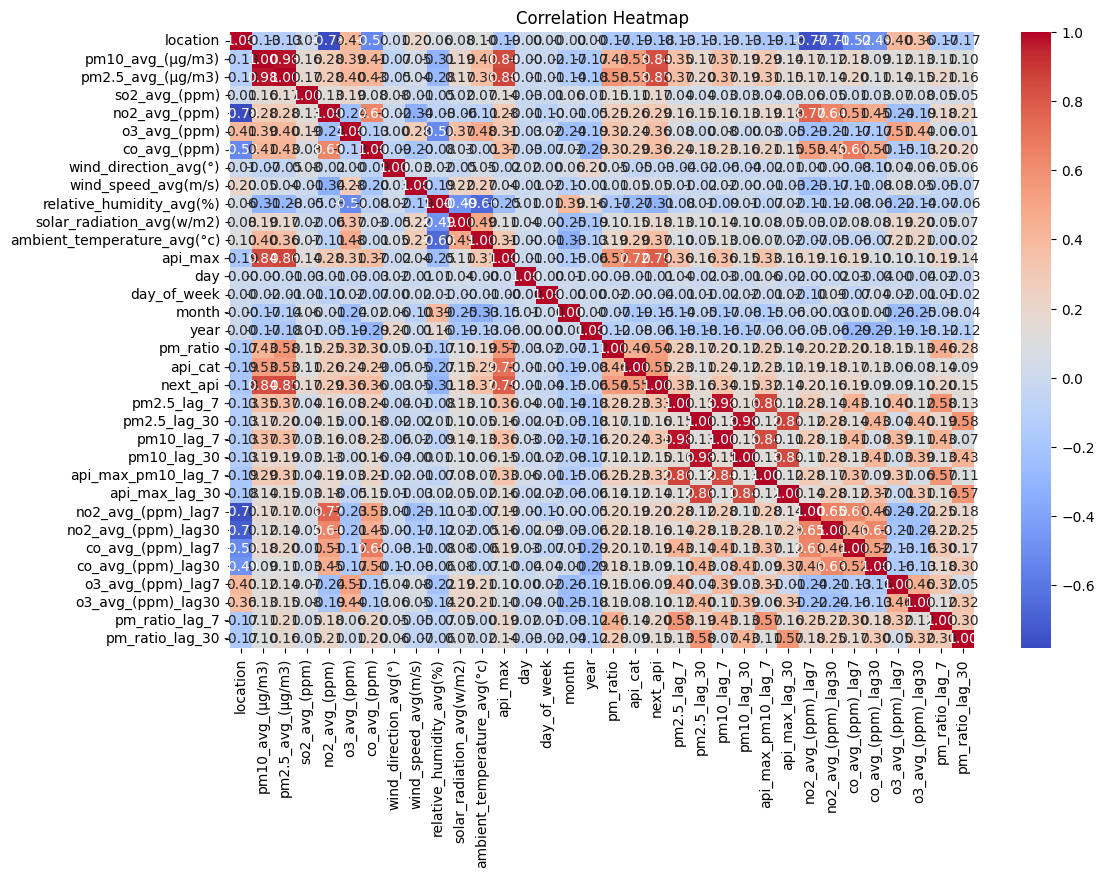

In [ ]:
# Drop low correlation features
plt.figure(figsize=(12,8))

sns.heatmap(dfpp.corr(),annot=True,cmap='coolwarm', fmt='0.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Drop the target variable
df1 = dfpp.drop(columns=['api_max'],axis=1)

# Define X and y variables
X = df1
y = dfpp['api_max']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shape of the datasets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (5112, 33) (5112,)
Validation set: (1096, 33) (1096,)
Test set: (1096, 33) (1096,)


In [ ]:
# Preprocess the data
# Select the obj and cat features
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [ ]:
# Pipeline steps
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# Combine transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

### Modelling

XGB model is selected due to the best perfomance in the previous model comparison section.

In [ ]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [ ]:
# Define parameters range
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0]
}

In [ ]:
# Grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Minimize RMSE
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.9, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}


In [ ]:
# Predictions
y_pred_test = best_xgb.predict(X_test)
y_pred_val = best_xgb.predict(X_val)

# Test set metrics
xgb_mae_test_v3 = mean_absolute_error(y_test, y_pred_test)
xgb_mse_test_v3 = mean_squared_error(y_test, y_pred_test)
xgb_rmse_test_v3 = np.sqrt(xgb_mse_test_v3)
xgb_r2_test_v3 = r2_score(y_test, y_pred_test)

print("\nTest Set Evaluation Metrics:")
print(f"  MAE: {xgb_mae_test_v3:.4f}, MSE: {xgb_mse_test_v3:.4f}, RMSE: {xgb_rmse_test_v3:.4f}, R²: {xgb_r2_test_v3:.4f}")

# Validation set metrics
xgb_mae_val_v3 = mean_absolute_error(y_val, y_pred_val)
xgb_mse_val_v3 = mean_squared_error(y_val, y_pred_val)
xgb_rmse_val_v3 = np.sqrt(xgb_mse_val_v3)
xgb_r2_val_v3 = r2_score(y_val, y_pred_val)

print("\nValidation Set Evaluation Metrics:")
print(f"  MAE: {xgb_mae_val_v3:.4f}, MSE: {xgb_mse_val_v3:.4f}, RMSE: {xgb_rmse_val_v3:.4f}, R²: {xgb_r2_val_v3:.4f}")


Test Set Evaluation Metrics:
  MAE: 3.0095, MSE: 17.8545, RMSE: 4.2255, R²: 0.8923

Validation Set Evaluation Metrics:
  MAE: 2.9680, MSE: 18.1940, RMSE: 4.2654, R²: 0.8708


In [ ]:
# After tuning
metrics_after = {
    "XGBoost": [xgb_rmse_val, xgb_r2_val]
}

# After feature engineering
metrics_FE = {
    "XGBoost": [xgb_rmse_val_v3, xgb_r2_val_v3]
}

In [ ]:
df_results = pd.DataFrame.from_dict(metrics_after, orient='index', columns=['RMSE Before', 'R² Before'])
df_results[['RMSE After FE', 'R² After FE']] = pd.DataFrame.from_dict(metrics_FE, orient='index')

# Calculate percentage improvement
df_results['RMSE Improvement (%)'] = ((df_results['RMSE Before'] - df_results['RMSE After FE']) / df_results['RMSE Before']) * 100
df_results['R² Improvement (%)'] = ((df_results['R² After FE'] - df_results['R² Before']) / df_results['R² Before']) * 100

print(df_results)


         RMSE Before  R² Before  RMSE After FE  R² After FE  \
XGBoost     4.431148   0.860604       4.265442     0.870835   

         RMSE Improvement (%)  R² Improvement (%)  
XGBoost              3.739573            1.188777  


After applying feature engineering, the XGBoost model demonstrated an improvement in predictive performance:

* RMSE decreased from 4.4311 to 4.2654, reflecting a 3.74% improvement in error reduction.
* R² increased from 0.8606 to 0.8708, indicating a 1.19% improvement in model accuracy and explanatory power.


These improvements suggest that the engineered features, such as lag variables and pollutant interactions, effectively captured underlying temporal patterns and dependencies.

# 8.0 Conclusion
Overall, XGBoost reduced its RMSE from 4.6267 to 4.2654 (7.81% of improvement) after implementing hyperparameter tuning, indicating that the method is effective in optimizing model performance by fine-tuning key parameters. This improvement suggests that hyperparameter tuning helps in better capturing the underlying patterns in the data, enhancing the model's predictive accuracy and reducing errors.